In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# data files
county_statistics = "county_statistics.csv"
diagnostics = "Diagnostics.csv"

In [3]:
# Read in the files
county_statistics_data = pd.read_csv(county_statistics)
diagnostics_data = pd.read_csv(diagnostics)

In [4]:
# round to two decimal places in python pandas 
pd.options.display.float_format = '{:.3f}'.format

In [5]:
# View the data
county_statistics_data.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.000,6742.000,3712.000,0.661,0.330,...,1.800,1.800,6.500,25.800,9505.000,78.800,13.300,7.800,0.100,9.400
1,1,Acadia,LA,0.773,0.206,27386.000,21159.000,5638.000,0.795,0.191,...,1.600,2.200,2.500,27.600,24982.000,80.000,12.100,7.600,0.300,8.900
2,2,Accomack,VA,0.545,0.428,15755.000,8582.000,6737.000,0.542,0.447,...,2.600,1.800,4.500,22.000,13837.000,74.600,18.100,7.100,0.200,5.400
3,3,Ada,ID,0.479,0.387,195587.000,93748.000,75676.000,0.504,0.465,...,1.500,2.800,6.900,20.400,214984.000,78.300,15.000,6.600,0.100,4.300
4,4,Adair,IA,0.653,0.300,3759.000,2456.000,1127.000,0.697,0.286,...,2.800,0.400,6.200,22.300,3680.000,73.800,15.300,10.400,0.500,3.000


In [6]:
# Check values
county_statistics_data.count()

Unnamed: 0                      4867
county                          4867
state                           4867
percentage16_Donald_Trump       3111
percentage16_Hillary_Clinton    3111
total_votes16                   3111
votes16_Donald_Trump            3111
votes16_Hillary_Clinton         3111
percentage20_Donald_Trump       4490
percentage20_Joe_Biden          4490
total_votes20                   4633
votes20_Donald_Trump            4633
votes20_Joe_Biden               4633
lat                             3252
long                            3252
cases                           3252
deaths                          3252
TotalPop                        3142
Men                             3142
Women                           3142
Hispanic                        3142
White                           3142
Black                           3142
Native                          3142
Asian                           3142
Pacific                         3142
VotingAgeCitizen                3142
I

In [7]:
# Drop empty lines
county_statistics_data = county_statistics_data.dropna()

In [8]:
# Check values again
county_statistics_data.count()

Unnamed: 0                      3046
county                          3046
state                           3046
percentage16_Donald_Trump       3046
percentage16_Hillary_Clinton    3046
total_votes16                   3046
votes16_Donald_Trump            3046
votes16_Hillary_Clinton         3046
percentage20_Donald_Trump       3046
percentage20_Joe_Biden          3046
total_votes20                   3046
votes20_Donald_Trump            3046
votes20_Joe_Biden               3046
lat                             3046
long                            3046
cases                           3046
deaths                          3046
TotalPop                        3046
Men                             3046
Women                           3046
Hispanic                        3046
White                           3046
Black                           3046
Native                          3046
Asian                           3046
Pacific                         3046
VotingAgeCitizen                3046
I

In [9]:
# Check data types
county_statistics_data.dtypes

Unnamed: 0                        int64
county                           object
state                            object
percentage16_Donald_Trump       float64
percentage16_Hillary_Clinton    float64
total_votes16                   float64
votes16_Donald_Trump            float64
votes16_Hillary_Clinton         float64
percentage20_Donald_Trump       float64
percentage20_Joe_Biden          float64
total_votes20                   float64
votes20_Donald_Trump            float64
votes20_Joe_Biden               float64
lat                             float64
long                            float64
cases                           float64
deaths                          float64
TotalPop                        float64
Men                             float64
Women                           float64
Hispanic                        float64
White                           float64
Black                           float64
Native                          float64
Asian                           float64


In [10]:
# Group the statistics data by Michigan counties
mi_county_stats = county_statistics_data.loc[county_statistics_data['state'] == 'MI'].groupby('county')
mi_county_stats.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
30,30,Alcona,MI,0.680,0.280,6179.000,4201.000,1732.000,0.686,0.303,...,1.800,2.300,5.300,24.000,3357.000,78.300,14.000,7.500,0.200,9.300
36,36,Alger,MI,0.573,0.368,4513.000,2585.000,1663.000,0.587,0.400,...,4.300,1.800,8.000,21.300,3160.000,77.100,17.600,5.300,0.000,6.900
38,38,Allegan,MI,0.613,0.325,55153.000,33812.000,17932.000,0.616,0.364,...,1.400,0.700,4.100,23.900,54028.000,86.300,7.700,5.900,0.200,3.600
50,50,Alpena,MI,0.619,0.332,14688.000,9090.000,4877.000,0.630,0.354,...,2.700,1.200,3.900,16.900,12665.000,83.000,10.400,6.400,0.200,6.400
69,69,Antrim,MI,0.624,0.328,13572.000,8469.000,4448.000,0.564,0.420,...,1.900,1.000,7.300,25.000,9771.000,79.600,9.900,10.300,0.200,6.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,2812,Tuscola,MI,0.666,0.286,26157.000,17421.000,7493.000,0.689,0.295,...,2.200,1.100,3.000,29.100,22987.000,81.400,10.700,7.700,0.200,7.400
2854,2854,Van Buren,MI,0.539,0.399,33213.000,17890.000,13258.000,0.553,0.430,...,2.900,0.800,4.100,24.400,33499.000,81.600,11.600,6.700,0.100,6.600
2954,2954,Washtenaw,MI,0.269,0.684,187201.000,50335.000,128025.000,0.259,0.724,...,6.500,2.500,5.900,23.700,183919.000,77.700,17.600,4.600,0.200,5.400
2965,2965,Wayne,MI,0.295,0.668,773983.000,228313.000,517022.000,0.307,0.681,...,1.900,1.600,3.200,25.200,722115.000,86.700,9.500,3.700,0.100,11.600


In [11]:
# View diagnostics_data
diagnostics_data

,COUNTY,MessageDate,Negative,Positive,Total
0,Alcona,3/17/2020,1,0,1
1,Alcona,3/20/2020,2,0,2
2,Alcona,3/23/2020,1,0,1
3,Alcona,3/24/2020,1,0,1
4,Alcona,3/25/2020,2,0,2
...,...,...,...,...,...
25104,Wexford,1/3/2021,59,6,65
25105,Wexford,1/4/2021,43,12,55
25106,Wexford,1/5/2021,91,14,105
25107,Wexford,1/6/2021,73,21,94


In [12]:
# Create dataframe for Kalamazoo County data
kalamazoo_diagnostics = diagnostics_data.loc[diagnostics_data["COUNTY"] == "Kalamazoo"]
kalamazoo_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
11707,Kalamazoo,3/16/2020,7,0,7
11708,Kalamazoo,3/18/2020,3,0,3
11709,Kalamazoo,3/19/2020,2,0,2
11710,Kalamazoo,3/20/2020,8,0,8
11711,Kalamazoo,3/21/2020,13,0,13
...,...,...,...,...,...
11999,Kalamazoo,1/3/2021,852,125,977
12000,Kalamazoo,1/4/2021,797,64,861
12001,Kalamazoo,1/5/2021,949,150,1099
12002,Kalamazoo,1/6/2021,850,105,955


In [13]:
# Create dataframe for Monroe County data
monroe_diagnostics = diagnostics_data.loc[diagnostics_data["COUNTY"] == "Monroe"]
monroe_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
17181,Monroe,3/14/2020,0,1,1
17182,Monroe,3/16/2020,7,0,7
17183,Monroe,3/17/2020,5,0,5
17184,Monroe,3/18/2020,9,1,10
17185,Monroe,3/19/2020,3,1,4
...,...,...,...,...,...
17475,Monroe,1/3/2021,534,61,595
17476,Monroe,1/4/2021,365,27,392
17477,Monroe,1/5/2021,654,85,739
17478,Monroe,1/6/2021,458,68,526


In [14]:
# Create dataframe for Washtenaw County data
washtenaw_diagnostics = diagnostics_data.loc[diagnostics_data["COUNTY"] == "Washtenaw"]
washtenaw_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
24210,Washtenaw,3/12/2020,0,2,2
24211,Washtenaw,3/13/2020,0,1,1
24212,Washtenaw,3/14/2020,0,1,1
24213,Washtenaw,3/15/2020,0,2,2
24214,Washtenaw,3/16/2020,4,0,4
...,...,...,...,...,...
24507,Washtenaw,1/3/2021,1581,127,1708
24508,Washtenaw,1/4/2021,1011,102,1113
24509,Washtenaw,1/5/2021,2822,254,3076
24510,Washtenaw,1/6/2021,1406,157,1563


In [15]:
# Create dataframe for Wayne County data
wayne_diagnostics = diagnostics_data.loc[diagnostics_data["COUNTY"] == "Wayne"]
wayne_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
24512,Wayne,3/10/2020,0,1,1
24513,Wayne,3/12/2020,0,1,1
24514,Wayne,3/13/2020,1,3,4
24515,Wayne,3/14/2020,0,1,1
24516,Wayne,3/15/2020,1,4,5
...,...,...,...,...,...
24810,Wayne,1/3/2021,3826,529,4355
24811,Wayne,1/4/2021,3048,456,3504
24812,Wayne,1/5/2021,4932,783,5715
24813,Wayne,1/6/2021,4109,501,4610


In [16]:
# Create a new dataframe to combine Kalamazoo and Monroe county data
monkaz_diagnostics = pd.concat([kalamazoo_diagnostics, monroe_diagnostics], ignore_index=True)
monkaz_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
0,Kalamazoo,3/16/2020,7,0,7
1,Kalamazoo,3/18/2020,3,0,3
2,Kalamazoo,3/19/2020,2,0,2
3,Kalamazoo,3/20/2020,8,0,8
4,Kalamazoo,3/21/2020,13,0,13
...,...,...,...,...,...
591,Monroe,1/3/2021,534,61,595
592,Monroe,1/4/2021,365,27,392
593,Monroe,1/5/2021,654,85,739
594,Monroe,1/6/2021,458,68,526


In [17]:
# Create a new dataframe to combine Washtenaw and Wayne county data
washwayne_diagnostics = pd.concat([washtenaw_diagnostics, wayne_diagnostics], ignore_index=True)
washwayne_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
0,Washtenaw,3/12/2020,0,2,2
1,Washtenaw,3/13/2020,0,1,1
2,Washtenaw,3/14/2020,0,1,1
3,Washtenaw,3/15/2020,0,2,2
4,Washtenaw,3/16/2020,4,0,4
...,...,...,...,...,...
600,Wayne,1/3/2021,3826,529,4355
601,Wayne,1/4/2021,3048,456,3504
602,Wayne,1/5/2021,4932,783,5715
603,Wayne,1/6/2021,4109,501,4610


In [18]:
# Create a new dataframe to combine the four counties
fourcounty_diagnostics = pd.concat([monkaz_diagnostics, washwayne_diagnostics], ignore_index=True)
fourcounty_diagnostics

,COUNTY,MessageDate,Negative,Positive,Total
0,Kalamazoo,3/16/2020,7,0,7
1,Kalamazoo,3/18/2020,3,0,3
2,Kalamazoo,3/19/2020,2,0,2
3,Kalamazoo,3/20/2020,8,0,8
4,Kalamazoo,3/21/2020,13,0,13
...,...,...,...,...,...
1196,Wayne,1/3/2021,3826,529,4355
1197,Wayne,1/4/2021,3048,456,3504
1198,Wayne,1/5/2021,4932,783,5715
1199,Wayne,1/6/2021,4109,501,4610


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the total tests for each county
fourcounty_diagnostics_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Total']
fourcounty_diagnostics_mean = fourcounty_diagnostics.groupby('COUNTY').mean()['Total']
fourcounty_diagnostics_median = fourcounty_diagnostics.groupby('COUNTY').median()['Total']
fourcounty_diagnostics_variance = fourcounty_diagnostics.groupby('COUNTY').var()['Total']
fourcounty_diagnostics_standard_deviation = fourcounty_diagnostics.groupby('COUNTY').std()['Total']
fourcounty_diagnostics_sem = fourcounty_diagnostics.groupby('COUNTY').sem()['Total']

foursummary_total = pd.DataFrame({"Total":fourcounty_diagnostics_sum,
                                  "Mean":fourcounty_diagnostics_mean,
                                  "Median":fourcounty_diagnostics_median,
                                  "Variance":fourcounty_diagnostics_variance,
                                  "Standard Deviation":fourcounty_diagnostics_standard_deviation,
                                  "SEM":fourcounty_diagnostics_sem
                                })
foursummary_total

,Total,Mean,Median,Variance,Standard Deviation,SEM
COUNTY,,,,,,
Kalamazoo,207220,697.710,571.000,298234.328,546.108,31.688
Monroe,102378,342.401,266.000,82866.630,287.866,16.648
Washtenaw,366934,1215.013,1072.500,908235.136,953.014,54.840
Wayne,924434,3050.937,2740.000,3787250.138,1946.086,111.800


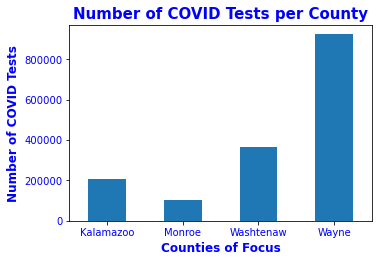

In [20]:
# Generate a bar plot showing the total number of COVID tests per county
four_bar_plot = fourcounty_diagnostics.groupby('COUNTY').sum()['Total']
four_bar_plot_data = four_bar_plot.plot.bar(rot='horizontal')
plt.xticks(color = 'blue')
plt.yticks(color = 'blue')
plt.title('Number of COVID Tests per County', color = 'blue', fontweight = 'bold', fontsize = '15')
plt.xlabel('Counties of Focus', color = 'blue', fontweight = 'bold', fontsize = '12')
plt.ylabel('Number of COVID Tests', color = 'blue', fontweight = 'bold', fontsize = '12')

plt.subplots_adjust(bottom = 0.2, left = 0.2)

plt.show()

In [21]:
# Generate a summary statistics table of negative, positive and total tests for each county
co_negative_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Negative']
co_total_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Total']
co_positive_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Positive']

neg_pos_stats = pd.DataFrame({"Negative":co_negative_sum,
                              "Total":co_total_sum,
                              "Positive":co_positive_sum
                            })

neg_pos_stats

,Negative,Total,Positive
COUNTY,,,
Kalamazoo,191594,207220,15626
Monroe,93456,102378,8922
Washtenaw,350313,366934,16621
Wayne,840235,924434,84199


In [22]:
# Create data frame for population. I could not figure out how to get this column from the statistics data and merge it
population_df = {'COUNTY':  ['Kalamazoo', 'Monroe', 'Washtenaw', 'Wayne'],
              'Population':  ['259830', '149619', '361509', '1763822']
             }
population_df = pd.DataFrame(population_df) 
population_df

,COUNTY,Population
0,Kalamazoo,259830
1,Monroe,149619
2,Washtenaw,361509
3,Wayne,1763822


In [23]:
# Once I added it to the existing dataframe I could no longer perform calculations using the column
neg_pos_stats.merge(population_df, on='COUNTY')

,COUNTY,Negative,Total,Positive,Population
0,Kalamazoo,191594,207220,15626,259830
1,Monroe,93456,102378,8922,149619
2,Washtenaw,350313,366934,16621,361509
3,Wayne,840235,924434,84199,1763822


In [24]:
# I made a new dataframe from scratch, but I still could not do calculations with the data
data_df = {'COUNTY':  ['Kalamazoo', 'Monroe', 'Washtenaw', 'Wayne'],
            'Negative': ['191594', '93456', '350313', '840235'],
            'Total': ['207220', '102378', '366934', '924434'],
            'Positive': ['15626', '8922', '16621', '84199'],
            'Population':  ['259830', '149619', '361509', '1763822']
          }
data_df = pd.DataFrame(data_df) 
data_df

,COUNTY,Negative,Total,Positive,Population
0,Kalamazoo,191594,207220,15626,259830
1,Monroe,93456,102378,8922,149619
2,Washtenaw,350313,366934,16621,361509
3,Wayne,840235,924434,84199,1763822


Text(0, 0.5, 'Number of COVID Tests')

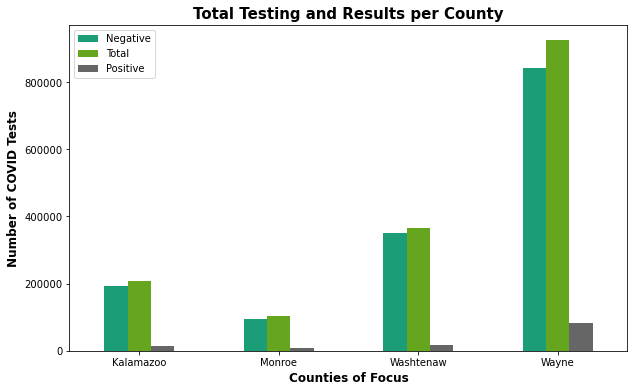

In [25]:
# Creates a pandas Bar plot using the diagnostics dataframe with some new things I found on line
neg_pos_stats.plot(kind='bar', cmap='Dark2', figsize=(10,6), rot=0);
plt.title('Total Testing and Results per County', color = 'black', fontweight = 'bold', fontsize = '15')
plt.xlabel('Counties of Focus', color = 'black', fontweight = 'bold', fontsize = '12')
plt.ylabel('Number of COVID Tests', color = 'black', fontweight = 'bold', fontsize = '12')

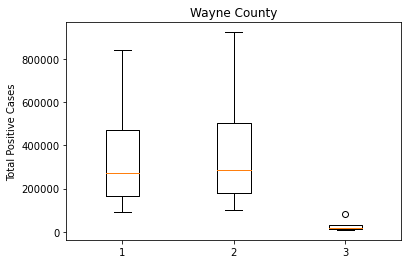

In [26]:
# I tried to create a box and whiskers plot, but I don't know what it is doing. Abandoned item
fig1, ax1 = plt.subplots()
ax1.set_title('Wayne County')
ax1.set_ylabel('Total Positive Cases')
ax1.boxplot(neg_pos_stats)
plt.show()

In [27]:
# Format float
pd.options.display.float_format = '{:.4f}'.format

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the total tests for
# for each Michigan county. Just practicing
mi_test_sum = diagnostics_data.groupby('COUNTY').sum()['Total']
mi_test_mean = diagnostics_data.groupby('COUNTY').mean()['Total']
mi_test_median = diagnostics_data.groupby('COUNTY').median()['Total']
mi_test_variance = diagnostics_data.groupby('COUNTY').var()['Total']
mi_test_standard_deviation = diagnostics_data.groupby('COUNTY').std()['Total']
mi_test_sem = diagnostics_data.groupby('COUNTY').sem()['Total']

summary_stats = pd.DataFrame({"Sum":mi_test_sum,
                              "Mean":mi_test_mean,
                              "Median":mi_test_median,
                              "Variance":mi_test_variance,
                              "Standard Deviation":mi_test_standard_deviation,
                              "SEM":mi_test_sem
                            })
summary_stats

,Sum,Mean,Median,Variance,Standard Deviation,SEM
COUNTY,,,,,,
Alcona,4418,15.4476,11.0000,189.0902,13.7510,0.8131
Alger,5085,18.6949,8.0000,749.9914,27.3860,1.6605
Allegan,80343,272.3492,248.0000,35270.8199,187.8053,10.9344
Alpena,11693,39.6373,15.0000,3679.4904,60.6588,3.5317
Antrim,14125,48.2082,30.0000,2405.9942,49.0509,2.8656
...,...,...,...,...,...,...
Unknown,403258,1330.8845,1199.0000,900872.8641,949.1432,54.5269
Van Buren,67320,227.4324,188.5000,31060.6598,176.2403,10.2438
Washtenaw,366934,1215.0132,1072.5000,908235.1360,953.0137,54.8398


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the total tests for 
# all Michigan counties using the aggregation method, produce the same summary statistics in a single line
agg_summary = diagnostics_data.groupby('COUNTY')[['Total']].agg(['sum', 'mean', 'median', 'var', 'std', 'sem'])
agg_summary

Total                                                    
              sum      mean    median          var       std      sem
COUNTY                                                               
Alcona       4418   15.4476   11.0000     189.0902   13.7510   0.8131
Alger        5085   18.6949    8.0000     749.9914   27.3860   1.6605
Allegan     80343  272.3492  248.0000   35270.8199  187.8053  10.9344
Alpena      11693   39.6373   15.0000    3679.4904   60.6588   3.5317
Antrim      14125   48.2082   30.0000    2405.9942   49.0509   2.8656
...           ...       ...       ...          ...       ...      ...
Unknown    403258 1330.8845 1199.0000  900872.8641  949.1432  54.5269
Van Buren   67320  227.4324  188.5000   31060.6598  176.2403  10.2438
Washtenaw  366934 1215.0132 1072.5000  908235.1360  953.0137  54.8398
Wayne      924434 3050.9373 2740.0000 3787250.1384 1946.0859 111.7997
Wexford     19169   65.2007   53.5000    2690.9801   51.8747   3.0254

[86 rows x 6 columns]

Text(0, 0.5, 'Number of COVID-19 Tests')

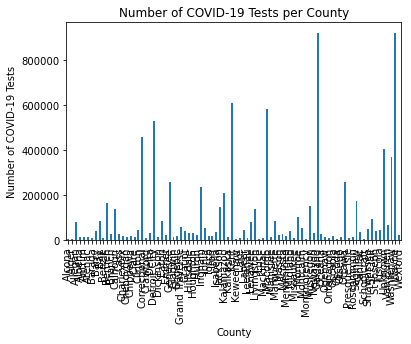

In [29]:
# Generate a bar plot showing the total number of tests for each Michigan county. I need more time to figure out how to
# fix the width.
bar_plot = diagnostics_data.groupby('COUNTY').sum()['Total']
bar_plot_data = bar_plot.plot.bar(rot='vertical', title='Number of COVID-19 Tests per County')
bar_plot_data.set_xlabel("County")
bar_plot_data.set_ylabel("Number of COVID-19 Tests")


In [30]:
# Top five testing counties in Michigan
top_five_testing_counties = summary_stats.sort_values("Sum", ascending=False)
top_five_testing_counties.head(5)

,Sum,Mean,Median,Variance,Standard Deviation,SEM
COUNTY,,,,,,
Wayne,924434,3050.9373,2740.0000,3787250.1384,1946.0859,111.7997
Oakland,922106,3063.4751,2720.0000,4320524.2302,2078.5871,119.8078
Kent,609115,2037.1739,1980.0000,1935807.1039,1391.3329,80.4629
Macomb,581822,1932.9635,1690.0000,1808591.9820,1344.8390,77.5152
Detroit City,528225,1754.9003,1720.0000,681353.7367,825.4415,47.5777


In [31]:
# Bottom five testing counties in Michigan
bottom_five_testing_counties = summary_stats.sort_values("Sum", ascending=True)
bottom_five_testing_counties.head(5)

,Sum,Mean,Median,Variance,Standard Deviation,SEM
COUNTY,,,,,,
Keweenaw,1499,6.5174,4.0000,37.5608,6.1287,0.4041
Oscoda,3685,13.0212,7.0000,265.5953,16.2971,0.9688
Luce,3979,15.4225,5.0000,548.8675,23.4279,1.4586
Alcona,4418,15.4476,11.0000,189.0902,13.7510,0.8131
Montmorency,4522,15.8667,9.0000,366.8624,19.1537,1.1346


Text(0, 0.5, 'Number of Data Points')

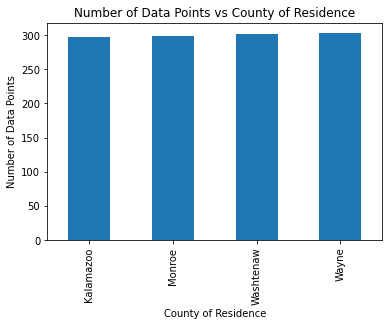

In [32]:
# Generate a bar plot showing number of total data points for each county of the four counties using pandas
# This just counts the number of test entries for each county.
barpd_data = fourcounty_diagnostics.groupby('COUNTY').count()['Total']
bar_plot_data = barpd_data.plot.bar(rot='vertical', title = 'Number of Data Points vs County of Residence')

bar_plot_data.set_xlabel("County of Residence")
bar_plot_data.set_ylabel("Number of Data Points")

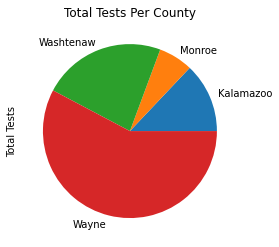

In [33]:
# Generated a pie chart for total tests
county_total_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Total']
pie_plot = county_total_sum.plot.pie(y='COUNTY',title='Total Tests Per County')
plt.ylabel('Total Tests')
plt.show()


In [34]:
# Looked at the numbers for total tests
county_total_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Total']
county_total_sum

COUNTY
Kalamazoo    207220
Monroe       102378
Washtenaw    366934
Wayne        924434
Name: Total, dtype: int64

In [35]:
# Looked at the numbers for negative tests
county_negative_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Negative']
county_negative_sum

COUNTY
Kalamazoo    191594
Monroe        93456
Washtenaw    350313
Wayne        840235
Name: Negative, dtype: int64

In [36]:
# Looked at the numbers for positive tests
county_positive_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Positive']
county_positive_sum

COUNTY
Kalamazoo    15626
Monroe        8922
Washtenaw    16621
Wayne        84199
Name: Positive, dtype: int64

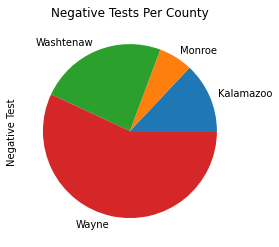

In [37]:
# Created a pie chart for negative tests in the four counties
county_negative_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Negative']

pie_plot = county_negative_sum.plot.pie(y='COUNTY',title='Negative Tests Per County')
plt.ylabel('Negative Test')
plt.show()

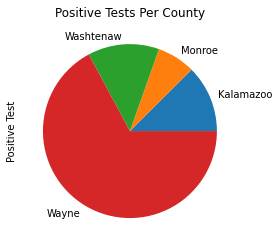

In [38]:
# Created a pie chart for the positive tests in the four counties
county_positive_sum = fourcounty_diagnostics.groupby('COUNTY').sum()['Positive']
pie_plot = county_positive_sum.plot.pie(y='COUNTY',title='Positive Tests Per County')
plt.ylabel('Positive Test')
plt.show()

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
hospitalization = "Hospitalization.csv"
county_statistics = "county_statistics.csv"
diagnostics = "Diagnostics.csv"
demographics = "Demographics.csv"
tests = "Tests.csv"
# Read the Covid data and the study results
hospitalization_data = pd.read_csv(hospitalization)
county_statistics_data = pd.read_csv(county_statistics)
diagnostics_data = pd.read_csv(diagnostics)
#demographics_data = pd.read_csv(demographics) no county key
tests_data = pd.read_csv(tests)
#hospitalization_data.head() # remove "Latitude" "Longitude"
#county_statistics_data.head()
#diagnostics_data.head()
#tests_data.head()
#demographics_data.head() no county key
diagnostics_data = diagnostics_data.rename(columns={'COUNTY': 'county'})
tests_data = tests_data.rename(columns={'County': 'county'})
# Combine the data into a single dataset
combined_covid = pd.merge(county_statistics_data, diagnostics_data, how="right", on=["county", "county"])
# Display the data table for preview
county_graph_state = combined_covid.loc[(combined_covid["state"] == 'MI')]
#county_graph = combined_covid.loc[(combined_covid["county"] == 'Kalamazoo') | (combined_covid["county"] == 'Monroe') | (combined_covid["county"] == 'Wayne')
                                   #| (combined_covid["county"] == 'Washtenaw')]
#county_graph_state = county_graph.loc[(county_graph["state"] == 'MI')]
county_graph_state.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,MessageDate,Negative,Positive,Total
0,30.0000,Alcona,MI,0.6800,0.2800,6179.0000,4201.0000,1732.0000,0.6860,0.3030,...,3357.0000,78.3000,14.0000,7.5000,0.2000,9.3000,3/17/2020,1,0,1
1,30.0000,Alcona,MI,0.6800,0.2800,6179.0000,4201.0000,1732.0000,0.6860,0.3030,...,3357.0000,78.3000,14.0000,7.5000,0.2000,9.3000,3/20/2020,2,0,2
2,30.0000,Alcona,MI,0.6800,0.2800,6179.0000,4201.0000,1732.0000,0.6860,0.3030,...,3357.0000,78.3000,14.0000,7.5000,0.2000,9.3000,3/23/2020,1,0,1
3,30.0000,Alcona,MI,0.6800,0.2800,6179.0000,4201.0000,1732.0000,0.6860,0.3030,...,3357.0000,78.3000,14.0000,7.5000,0.2000,9.3000,3/24/2020,1,0,1
4,30.0000,Alcona,MI,0.6800,0.2800,6179.0000,4201.0000,1732.0000,0.6860,0.3030,...,3357.0000,78.3000,14.0000,7.5000,0.2000,9.3000,3/25/2020,2,0,2


<function matplotlib.pyplot.show(close=None, block=None)>

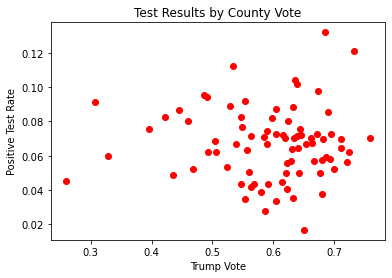

In [46]:
negatives = county_graph_state.groupby('county')['Negative'].sum()
positives = county_graph_state.groupby('county')['Positive'].sum()
total_test = county_graph_state.groupby('county')['Total'].sum()
candidate_link = county_graph_state.groupby('county')['percentage20_Joe_Biden'].mean()
candidate2_link = county_graph_state.groupby('county')['percentage20_Donald_Trump'].mean()
negative_pct = negatives/total_test
positive_pct = positives/total_test
negative_pct
positive_pct
county_names = county_graph_state["county"].unique()
positive_pct
#x_axis = ['kalamazoo', 'Wayne', 'Washtenaw', 'Monroe']
plt.scatter(candidate2_link, positive_pct, color = 'red')
plt.xlabel("Trump Vote")
plt.ylabel("Positive Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

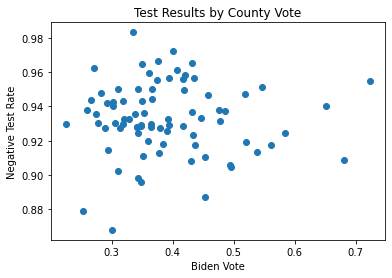

In [47]:
plt.scatter(candidate_link, negative_pct)
plt.xlabel("Biden Vote")
plt.ylabel("Negative Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

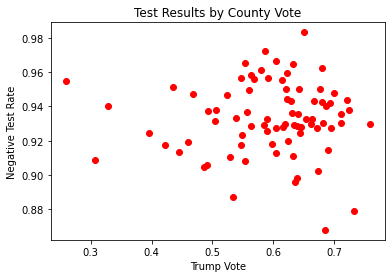

In [48]:
plt.scatter(candidate2_link, negative_pct, color = 'red')
plt.xlabel("Trump Vote")
plt.ylabel("Negative Test Rate")
plt.title("Test Results by County Vote")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

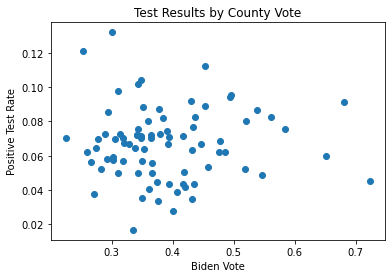

In [49]:
plt.scatter(candidate_link, positive_pct)
plt.xlabel("Biden Vote")
plt.ylabel("Positive Test Rate")
plt.title("Test Results by County Vote")
plt.show

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib
from matplotlib.ticker  import MaxNLocator
from collections import namedtuple

In [52]:
# Data Files
county = r"county_statistics.csv"
tests = r"tests.csv"

county = pd.read_csv(county)
tests = pd.read_csv(tests)

In [53]:
county.head()

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.6290,0.3460,10724.0000,6742.0000,3712.0000,0.6610,0.3300,...,1.8000,1.8000,6.5000,25.8000,9505.0000,78.8000,13.3000,7.8000,0.1000,9.4000
1,1,Acadia,LA,0.7730,0.2060,27386.0000,21159.0000,5638.0000,0.7950,0.1910,...,1.6000,2.2000,2.5000,27.6000,24982.0000,80.0000,12.1000,7.6000,0.3000,8.9000
2,2,Accomack,VA,0.5450,0.4280,15755.0000,8582.0000,6737.0000,0.5420,0.4470,...,2.6000,1.8000,4.5000,22.0000,13837.0000,74.6000,18.1000,7.1000,0.2000,5.4000
3,3,Ada,ID,0.4790,0.3870,195587.0000,93748.0000,75676.0000,0.5040,0.4650,...,1.5000,2.8000,6.9000,20.4000,214984.0000,78.3000,15.0000,6.6000,0.1000,4.3000
4,4,Adair,IA,0.6530,0.3000,3759.0000,2456.0000,1127.0000,0.6970,0.2860,...,2.8000,0.4000,6.2000,22.3000,3680.0000,73.8000,15.3000,10.4000,0.5000,3.0000


In [54]:
tests.head()

,COUNTY,TestType,Count,RatePerMillion,Updated
0,Alcona,Diagnostic,4418,424604.0000,2021/01/08 14:39:23
1,Alcona,Serology,139,13359.0000,2021/01/08 14:39:23
2,Alcona,Total,4557,437963.0000,2021/01/08 14:39:23
3,Alger,Diagnostic,5085,558300.0000,2021/01/08 14:39:23
4,Alger,Serology,316,34695.0000,2021/01/08 14:39:23


In [55]:
new_data = pd.concat([county, tests], axis=1, join="inner")
new_data

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,COUNTY,TestType,Count,RatePerMillion,Updated
0,0,Abbeville,SC,0.6290,0.3460,10724.0000,6742.0000,3712.0000,0.6610,0.3300,...,78.8000,13.3000,7.8000,0.1000,9.4000,Alcona,Diagnostic,4418,424604.0000,2021/01/08 14:39:23
1,1,Acadia,LA,0.7730,0.2060,27386.0000,21159.0000,5638.0000,0.7950,0.1910,...,80.0000,12.1000,7.6000,0.3000,8.9000,Alcona,Serology,139,13359.0000,2021/01/08 14:39:23
2,2,Accomack,VA,0.5450,0.4280,15755.0000,8582.0000,6737.0000,0.5420,0.4470,...,74.6000,18.1000,7.1000,0.2000,5.4000,Alcona,Total,4557,437963.0000,2021/01/08 14:39:23
3,3,Ada,ID,0.4790,0.3870,195587.0000,93748.0000,75676.0000,0.5040,0.4650,...,78.3000,15.0000,6.6000,0.1000,4.3000,Alger,Diagnostic,5085,558300.0000,2021/01/08 14:39:23
4,4,Adair,IA,0.6530,0.3000,3759.0000,2456.0000,1127.0000,0.6970,0.2860,...,73.8000,15.3000,10.4000,0.5000,3.0000,Alger,Serology,316,34695.0000,2021/01/08 14:39:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253,Bradford,PA,0.7070,0.2470,25399.0000,17957.0000,6263.0000,0.7160,0.2670,...,82.9000,9.8000,7.0000,0.3000,5.6000,Wayne,Serology,60767,55052.0000,2021/01/08 14:39:23
254,254,Bradley,AR,0.5920,0.3610,3652.0000,2163.0000,1317.0000,0.6400,0.3320,...,74.0000,19.0000,7.0000,0.0000,9.4000,Wayne,Total,985201,892544.0000,2021/01/08 14:39:23
255,255,Bradley,TN,0.7750,0.1840,38392.0000,29761.0000,7070.0000,0.7660,0.2140,...,82.5000,10.5000,6.7000,0.3000,7.2000,Wexford,Serology,772,22955.0000,2021/01/08 14:39:23
256,256,Branch,MI,0.6690,0.2870,16490.0000,11025.0000,4740.0000,0.6850,0.3000,...,82.7000,10.5000,6.6000,0.2000,4.6000,Wexford,Diagnostic,19169,569980.0000,2021/01/08 14:39:23


In [58]:
# I would be using a groupby if 
# "I want to summarize average of employment(Any column with numbers) PER categorical(columns which are not numbers)"
#Aveerage,Max,Min,Sum
newDF = new_data.groupby(['state'])['Unemployment'].agg([np.mean])
#decimals = 2    
newDF['Unemployment'] = newDF['mean'].apply(lambda x: round(x, decimals))
newDF

,mean,Unemployment
state,,
AL,7.2400,7.2400
AR,7.1333,7.1300
AZ,14.1000,14.1000
CA,9.9667,9.9700
CO,6.3714,6.3700
FL,6.6000,6.6000
GA,6.9692,6.9700
IA,4.1000,4.1000
ID,5.4091,5.4100


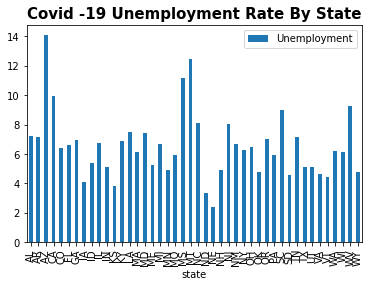

In [82]:
newDF.reset_index().plot.bar(x='state', y='Unemployment',)
plt.title('Covid -19 Unemployment Rate By State', color = 'black', fontweight = 'bold', fontsize = '15')
x_lim = 50 * np.pi
x_axis = np.arange(100, x_lim, 600)
sin = np.sin(x_axis)
# Increase the width

In [83]:
plt.figure(figsize=(60,600))

<Figure size 4320x43200 with 0 Axes>

<Figure size 4320x43200 with 0 Axes>

Text(0.5, 1.0, 'Covid -19 Unemployment Rate By State')

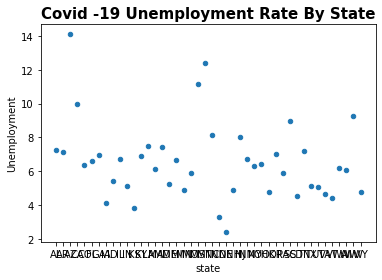

In [84]:
newDF.reset_index().plot.scatter(x='state', y='Unemployment',)
plt.title('Covid -19 Unemployment Rate By State', color = 'black', fontweight = 'bold', fontsize = '15')